In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv, eig
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.api import OLS

In [115]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
communities_and_crime = fetch_ucirepo(id=183) 
  
# data (as pandas dataframes) 
X = communities_and_crime.data.features 
y = communities_and_crime.data.targets 
  
# metadata 
print(communities_and_crime.metadata) 
  
# variable information 
print(communities_and_crime.variables) 


{'uci_id': 183, 'name': 'Communities and Crime', 'repository_url': 'https://archive.ics.uci.edu/dataset/183/communities+and+crime', 'data_url': 'https://archive.ics.uci.edu/static/public/183/data.csv', 'abstract': 'Communities within the United States. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1994, 'num_features': 127, 'feature_types': ['Real'], 'demographics': ['Race', 'Age', 'Income', 'Occupation'], 'target_col': ['ViolentCrimesPerPop'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2002, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C53W3X', 'creators': ['Michael Redmond'], 'intro_paper': {'ID': 405, 'type': 'NATIVE', 'title': 'A data-driven software tool for enabling cooperative information s

In [116]:
X = X.iloc[:, 5:]

In [117]:
X = X.applymap(pd.to_numeric, errors='coerce')

# Replace "?" with NaN
# how to convert all coliumn to numeric in python
X.replace("?", np.nan, inplace=True)

# Check the number of missing values in each column
print(X.isnull().sum())

population                0
householdsize             0
racepctblack              0
racePctWhite              0
racePctAsian              0
                       ... 
PolicOperBudg          1675
LemasPctPolicOnPatr    1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
Length: 122, dtype: int64


In [118]:
X_with_y = X.copy()  # Create a copy of X to avoid modifying the original
X_with_y['y'] = y
# X_with_y

In [119]:
# Drop rows with NaN or inf in X or y
X_with_y_cleaned = X_with_y.dropna()

# X_with_y_cleaned

In [120]:
y_new = X_with_y_cleaned['y']  # Dependent variable
X_new = X_with_y_cleaned.drop(columns=['y'])  # Independent variables

In [121]:
model = LinearRegression()
model.fit(X_new,y_new)

LinearRegression()

In [122]:
lsmodel = OLS(y_new,X_new).fit()
lsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              29.04
Date:                Mon, 24 Feb 2025   Prob (F-statistic):                    1.42e-83
Time:                        16:06:56   Log-Likelihood:                          225.27
No. Observations:                 319   AIC:                                     -206.5
Df Residuals:                     197   BIC:                                      252.8
Df Model:                         122                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
population               -3.1245      2.327     -1.343      0.181      -7.713       1.464
householdsize             0.9731      0.595      1.634      0.104      -0.201       2.147
racepctblack             -0.0253      0.206     -0.122      0.903      -0.432       0.381
racePctWhite              0.0641      0.291      0.220      0.826      -0.510       0.638
racePctAsian             -0.0278      0.136     -0.204      0.838      -0.296       0.241
racePctHisp               0.1694      0.205      0.826      0.410      -0.235       0.574
agePct12t21              -0.0175      0.588     -0.030      0.976      -1.177       1.142
agePct12t29              -0.4950      0.748     -0.662      0.509      -1.969       0.979
agePct16t24               0.1091      0.886      0.123      0.902      -1.639       1.857
agePct65up                0.3768      0.580      0.650      0.517      -0.767       1.521
numbUrban                 3.5066      2.355      1.489      0.138      -1.138       8.151
pctUrban                 -0.1554      0.167     -0.932      0.353      -0.484       0.173
medIncome                -0.1986      0.863     -0.230      0.818      -1.900       1.503
pctWWage                 -0.4702      0.550     -0.856      0.393      -1.554       0.614
pctWFarmSelf             -0.2572      0.146     -1.762      0.080      -0.545       0.031
pctWInvInc               -0.6972      0.292     -2.389      0.018      -1.273      -0.122
pctWSocSec               -0.5589      0.570     -0.981      0.328      -1.683       0.565
pctWPubAsst               0.2691      0.215      1.252      0.212      -0.155       0.693
pctWRetire                0.1004      0.195      0.515      0.607      -0.284       0.485
medFamInc                 0.6936      0.637      1.090      0.277      -0.562       1.949
perCapInc                -0.7966      0.693     -1.150      0.251      -2.162       0.569
whitePerCap               0.3566      0.421      0.847      0.398      -0.473       1.186
blackPerCap              -0.3033      0.228     -1.332      0.184      -0.752       0.146
indianPerCap              0.0615      0.118      0.520      0.604      -0.172       0.295
AsianPerCap              -0.1361      0.124     -1.095      0.275      -0.381       0.109
OtherPerCap               0.1337      0.129      1.035      0.302      -0.121       0.389
HispPerCap               -0.0799      0.147     -0.543      0.588      -0.370       0.211
NumUnderPov              -0.4369      0.315     -1.386      0.167      -1.058       0.185
PctPopUnderPov            0.5769      0.364      1.584      0.115      -0.142       1.295
PctLess9thGrade          -0.0998      0.319     -0.313      0.755      -0.729       0.530
PctNotHSGrad  

In [123]:
# Get p-values
p_values = lsmodel.pvalues

# Select variables with p ≤ 0.05
significant_vars = p_values[p_values <= 0.05].index

significant_vars

Index(['pctWInvInc', 'PctEmploy', 'PctEmplManu', 'PctOccupManu',
       'PctOccupMgmtProf', 'PctRecImmig8', 'PctRecImmig10', 'PctPersDenseHous',
       'PctWOFullPlumb', 'RentLowQ', 'NumStreet', 'PctForeignBorn'],
      dtype='object')

### Ridge Regression

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from numpy.linalg import inv, eig
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
try:
    import statsmodels.api.add_constant
except ImportError:
    pass

In [125]:
n = X_with_y_cleaned.shape[0] # doubt about this

In [126]:
X_with_y_cleaned

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,y
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
16,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
20,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,...,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
21,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,...,1.00,0.07,0.15,1.00,0.35,0.73,0.0,0.31,0.21,0.69
23,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,...,0.16,0.12,0.07,0.04,0.01,0.81,1.0,0.56,0.09,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,1.00,0.29,0.21,0.29,1.00,0.26,0.24,0.47,0.28,0.46,...,0.13,1.00,1.00,0.53,0.62,0.64,0.5,0.64,0.35,0.75
1981,0.07,0.38,0.17,0.84,0.11,0.04,0.35,0.41,0.30,0.64,...,0.09,0.13,0.17,0.02,0.01,0.72,0.0,0.62,0.15,0.07
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [127]:
y_new

0       0.20
16      0.49
20      0.34
21      0.69
23      0.63
        ... 
1969    0.75
1981    0.07
1991    0.23
1992    0.19
1993    0.48
Name: y, Length: 319, dtype: float64

In [128]:
y_centered = y_new - np.mean(y_new)
X_centered = X_new - np.mean(X_new, axis=0)

y_centered.to_numpy()
X_centered.to_numpy()
y_new.to_numpy()

# Standardize X (centered and scaled)
scaler = StandardScaler(with_mean=True, with_std=True)
X_standardized = scaler.fit_transform(X_new)

#Feature names
colnames = X.columns[0:122]
colnames

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up',
       ...
       'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans',
       'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop'],
      dtype='object', length=122)

In [129]:
print(X_standardized.shape)
print(y_centered.shape)

(319, 122)
(319,)


In [130]:
lam1 = n * 1
lam2 = n * 10

betals = np.linalg.inv(X_standardized.T @ X_standardized) @ (X_standardized.T @ y_centered)
betar1 = np.linalg.inv(X_standardized.T @ X_standardized + np.diag([lam1] * X_standardized.shape[1])) @ (X_standardized.T @ y_centered)
betar2 = np.linalg.inv(X_standardized.T @ X_standardized + np.diag([lam2] * X_standardized.shape[1])) @ (X_standardized.T @ y_centered)


print("Coefficients comparison:")
print(pd.DataFrame(np.column_stack((colnames,betals, betar1, betar2)), columns=["Feature","LS", "Lam=1", "Lam=10"]))

Coefficients comparison:
                 Feature        LS     Lam=1    Lam=10
0             population  -0.84393 -0.000538  0.001929
1          householdsize  0.163653  0.000921 -0.000069
2           racepctblack -0.013156  0.015858  0.007303
3           racePctWhite    0.0057 -0.015859 -0.007485
4           racePctAsian -0.020609  0.000797  0.000052
..                   ...       ...       ...       ...
117        PolicOperBudg  0.093341  0.003495  0.002488
118  LemasPctPolicOnPatr -0.035137  0.002336 -0.000286
119  LemasGangUnitDeploy  0.003829  0.007346  0.002126
120  LemasPctOfficDrugUn -0.011094 -0.005959 -0.000247
121      PolicBudgPerPop -0.046973  0.001761  0.001191

[122 rows x 4 columns]


In [131]:
ridge = Ridge(alpha=lam1, fit_intercept=False)
ridge.fit(X_standardized, y_centered)
beta3 = ridge.coef_

res = np.column_stack((colnames,betals, betar1, betar2, beta3))
res_columns = ["Feature","LS", "Lam=1", "Lam=10", "Ridge Lam=1"]
print(pd.DataFrame(res, columns=res_columns))

                 Feature        LS     Lam=1    Lam=10 Ridge Lam=1
0             population  -0.84393 -0.000538  0.001929   -0.000538
1          householdsize  0.163653  0.000921 -0.000069    0.000921
2           racepctblack -0.013156  0.015858  0.007303    0.015858
3           racePctWhite    0.0057 -0.015859 -0.007485   -0.015859
4           racePctAsian -0.020609  0.000797  0.000052    0.000797
..                   ...       ...       ...       ...         ...
117        PolicOperBudg  0.093341  0.003495  0.002488    0.003495
118  LemasPctPolicOnPatr -0.035137  0.002336 -0.000286    0.002336
119  LemasGangUnitDeploy  0.003829  0.007346  0.002126    0.007346
120  LemasPctOfficDrugUn -0.011094 -0.005959 -0.000247   -0.005959
121      PolicBudgPerPop -0.046973  0.001761  0.001191    0.001761

[122 rows x 5 columns]


In [132]:
%%script false

# 一个不错的尝试, 但是它减少了图中的feature数量

import numpy as np
import matplotlib.pyplot as plt

lambdas = np.exp(np.linspace(np.log(0.01), np.log(10000), 100))
betasr = np.zeros((len(lambdas), X_standardized.shape[1]))

for i, lamb in enumerate(lambdas):
    betasr[i, :] = np.linalg.inv(X_standardized.T @ X_standardized + np.diag([n*lamb] * X_standardized.shape[1])) @ (X_standardized.T @ y_centered / n)

plt.figure(figsize=(10, 6))

# Select a subset of features to display if too many
num_features = X_standardized.shape[1]
selected_indices = np.linspace(0, num_features - 1, min(num_features, 10), dtype=int)  # Pick 10 features

# Line styles for better distinction
line_styles = ['-', '--', '-.', ':']

for idx, j in enumerate(selected_indices):
    plt.plot(lambdas, betasr[:, j], linestyle=line_styles[idx % len(line_styles)], label=colnames[j])

plt.xscale("log")
plt.xlabel("Log Lambda")
plt.ylabel("Coefficients")
plt.title("Ridge Regression Coefficient Paths")

# Improve legend placement
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=8)

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


CalledProcessError: Command 'b'\n# \xe4\xb8\x80\xe4\xb8\xaa\xe4\xb8\x8d\xe9\x94\x99\xe7\x9a\x84\xe5\xb0\x9d\xe8\xaf\x95, \xe4\xbd\x86\xe6\x98\xaf\xe5\xae\x83\xe5\x87\x8f\xe5\xb0\x91\xe4\xba\x86\xe5\x9b\xbe\xe4\xb8\xad\xe7\x9a\x84feature\xe6\x95\xb0\xe9\x87\x8f\n\nimport numpy as np\nimport matplotlib.pyplot as plt\n\nlambdas = np.exp(np.linspace(np.log(0.01), np.log(10000), 100))\nbetasr = np.zeros((len(lambdas), X_standardized.shape[1]))\n\nfor i, lamb in enumerate(lambdas):\n    betasr[i, :] = np.linalg.inv(X_standardized.T @ X_standardized + np.diag([n*lamb] * X_standardized.shape[1])) @ (X_standardized.T @ y_centered / n)\n\nplt.figure(figsize=(10, 6))\n\n# Select a subset of features to display if too many\nnum_features = X_standardized.shape[1]\nselected_indices = np.linspace(0, num_features - 1, min(num_features, 10), dtype=int)  # Pick 10 features\n\n# Line styles for better distinction\nline_styles = [\'-\', \'--\', \'-.\', \':\']\n\nfor idx, j in enumerate(selected_indices):\n    plt.plot(lambdas, betasr[:, j], linestyle=line_styles[idx % len(line_styles)], label=colnames[j])\n\nplt.xscale("log")\nplt.xlabel("Log Lambda")\nplt.ylabel("Coefficients")\nplt.title("Ridge Regression Coefficient Paths")\n\n# Improve legend placement\nplt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=8)\n\nplt.tight_layout()  # Adjust layout to avoid overlap\nplt.show()\n'' returned non-zero exit status 1.

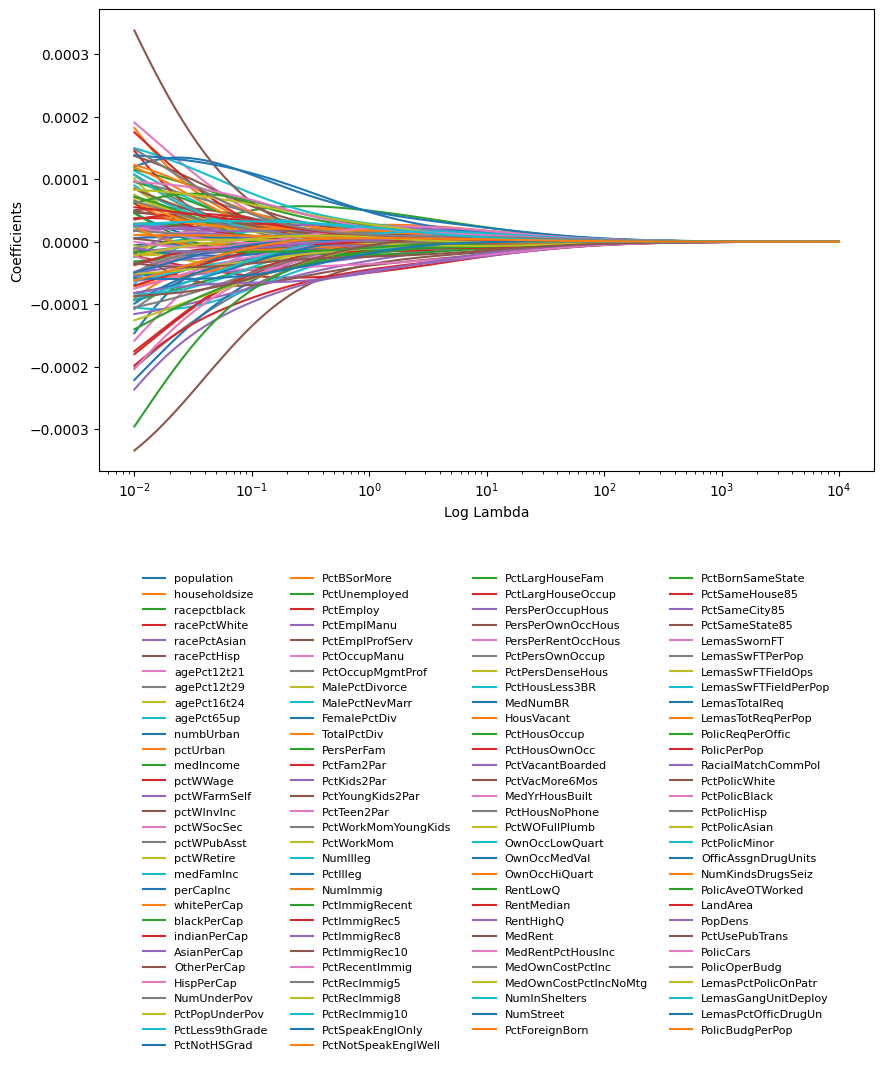

In [133]:
plt.figure(figsize=(10, 6))

# Plot all features
for j in range(X_standardized.shape[1]):
    plt.plot(lambdas, betasr[:, j], label=colnames[j])

plt.xscale("log")
plt.xlabel("Log Lambda")
plt.ylabel("Coefficients")
# plt.title("Ridge Regression Coefficient Paths")

# Move the legend below the plot with multiple columns
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize=8, frameon=False)

plt.tight_layout()  # Adjust layout
plt.show()


In [ ]:
%%script false

lambdas = np.exp(np.linspace(np.log(0.01), np.log(10000), 100))
betasr = np.zeros((len(lambdas), X.shape[1]))
for i, lamb in enumerate(lambdas):
    betasr[i, :] = np.linalg.inv(X_standardized.T @ X_standardized + np.diag([n*lamb] * X_standardized.shape[1])) @ (X_standardized.T @ y_centered / n)

# Plot Ridge paths
plt.figure(figsize=(10, 6))
for j in range(X_standardized.shape[1]):
    plt.plot(lambdas, betasr[:, j], label=f"Variable {j+1}")
plt.xscale("log")
plt.xlabel("Log Lambda")
plt.ylabel("Coefficients")
plt.title("Ridge Regression Coefficient Paths")
plt.legend(colnames)
plt.show()

CalledProcessError: Command 'b'\nlambdas = np.exp(np.linspace(np.log(0.01), np.log(10000), 100))\nbetasr = np.zeros((len(lambdas), X.shape[1]))\nfor i, lamb in enumerate(lambdas):\n    betasr[i, :] = np.linalg.inv(X_standardized.T @ X_standardized + np.diag([n*lamb] * X_standardized.shape[1])) @ (X_standardized.T @ y_centered / n)\n\n# Plot Ridge paths\nplt.figure(figsize=(10, 6))\nfor j in range(X_standardized.shape[1]):\n    plt.plot(lambdas, betasr[:, j], label=f"Variable {j+1}")\nplt.xscale("log")\nplt.xlabel("Log Lambda")\nplt.ylabel("Coefficients")\nplt.title("Ridge Regression Coefficient Paths")\nplt.legend(colnames)\nplt.show()\n'' returned non-zero exit status 1.

### Lasso Path

In [ ]:
fit0 = LinearRegression()
fit0.fit(X_standardized, y_centered)

lasso = Lasso(fit_intercept=False)
lasso.fit(X_standardized, y_centered)
print(pd.DataFrame(np.stack((colnames, fit0.coef_, lasso.coef_), axis=1), columns=["Variables", "Without L1","With L1"]))


               Variables Without L1 With L1
0             population   -0.84393     0.0
1          householdsize   0.163653     0.0
2           racepctblack  -0.013156     0.0
3           racePctWhite     0.0057    -0.0
4           racePctAsian  -0.020609    -0.0
..                   ...        ...     ...
117        PolicOperBudg   0.093341     0.0
118  LemasPctPolicOnPatr  -0.035137    -0.0
119  LemasGangUnitDeploy   0.003829     0.0
120  LemasPctOfficDrugUn  -0.011094     0.0
121      PolicBudgPerPop  -0.046973     0.0

[122 rows x 3 columns]


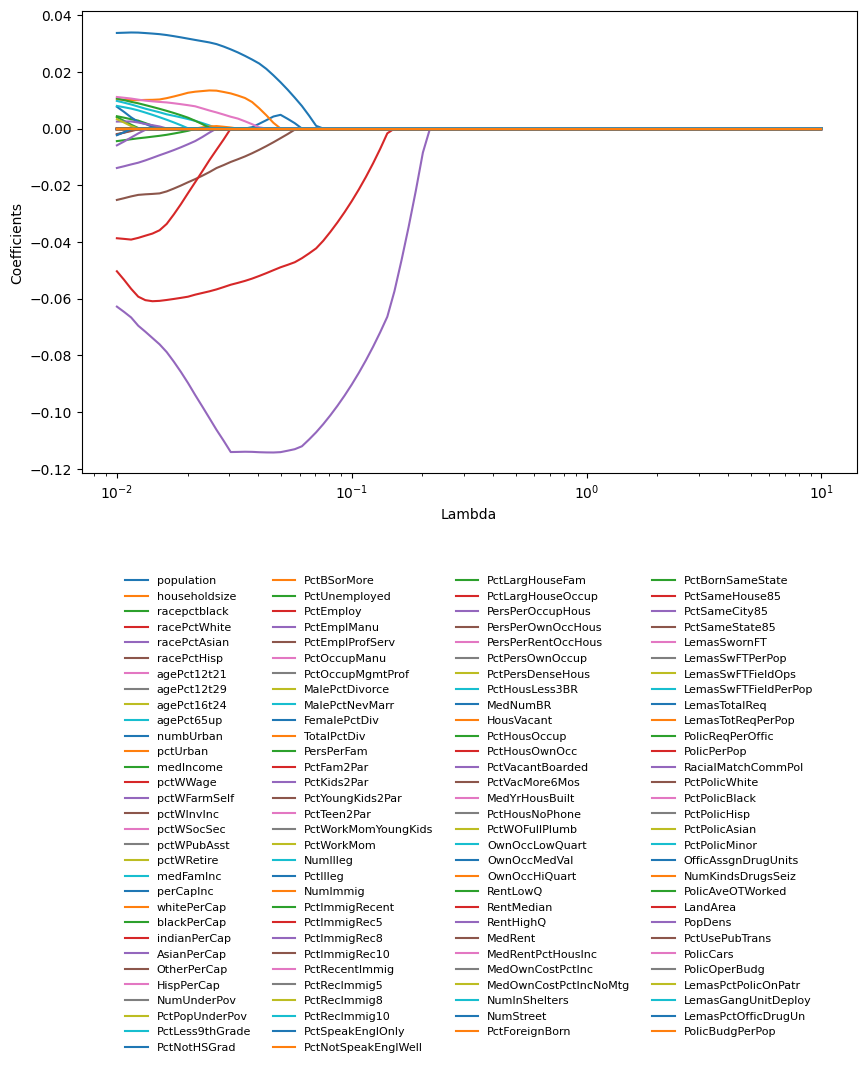

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

lambdas = np.exp(np.linspace(np.log(0.01), np.log(10), 100))
betasl = np.zeros((len(lambdas), X.shape[1]))

for i, lamb in enumerate(lambdas):
    lasso = Lasso(alpha=lamb)
    lasso.fit(X_standardized, y_centered)
    betasl[i, :] = lasso.coef_

# Plot Lasso paths (log-scale)
plt.figure(figsize=(10, 6))
for j in range(X_standardized.shape[1]):  # For each variable
    plt.plot(lambdas, betasl[:, j], label=colnames[j])

plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Coefficients")
# plt.title("Lasso Regression Coefficient Paths")

# Modify the legend box: multi-column, below the plot
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize=8, frameon=False)

plt.tight_layout()  # Adjust layout
plt.show()


In [ ]:
%%script false

lambdas = np.exp(np.linspace(np.log(0.01), np.log(10), 100))
betasl = np.zeros((len(lambdas), X.shape[1]))
for i, lamb in enumerate(lambdas):
    lasso = Lasso(alpha = lamb)
    lasso.fit(X_standardized, y_centered)
    betasl[i, :] = lasso.coef_

# Plot Lasso paths (log-scale)
plt.figure(figsize=(10, 6))
for j in range(X_standardized.shape[1]): #for each variable
    plt.plot(lambdas, betasl[:, j], label=f"Variable {j+1}")
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Coefficients")
plt.title("Lasso Regression Coefficient Paths")
plt.legend(colnames)
plt.show()

CalledProcessError: Command 'b'\nlambdas = np.exp(np.linspace(np.log(0.01), np.log(10), 100))\nbetasl = np.zeros((len(lambdas), X.shape[1]))\nfor i, lamb in enumerate(lambdas):\n    lasso = Lasso(alpha = lamb)\n    lasso.fit(X_standardized, y_centered)\n    betasl[i, :] = lasso.coef_\n\n# Plot Lasso paths (log-scale)\nplt.figure(figsize=(10, 6))\nfor j in range(X_standardized.shape[1]): #for each variable\n    plt.plot(lambdas, betasl[:, j], label=f"Variable {j+1}")\nplt.xscale("log")\nplt.xlabel("Lambda")\nplt.ylabel("Coefficients")\nplt.title("Lasso Regression Coefficient Paths")\nplt.legend(colnames)\nplt.show()\n'' returned non-zero exit status 1.

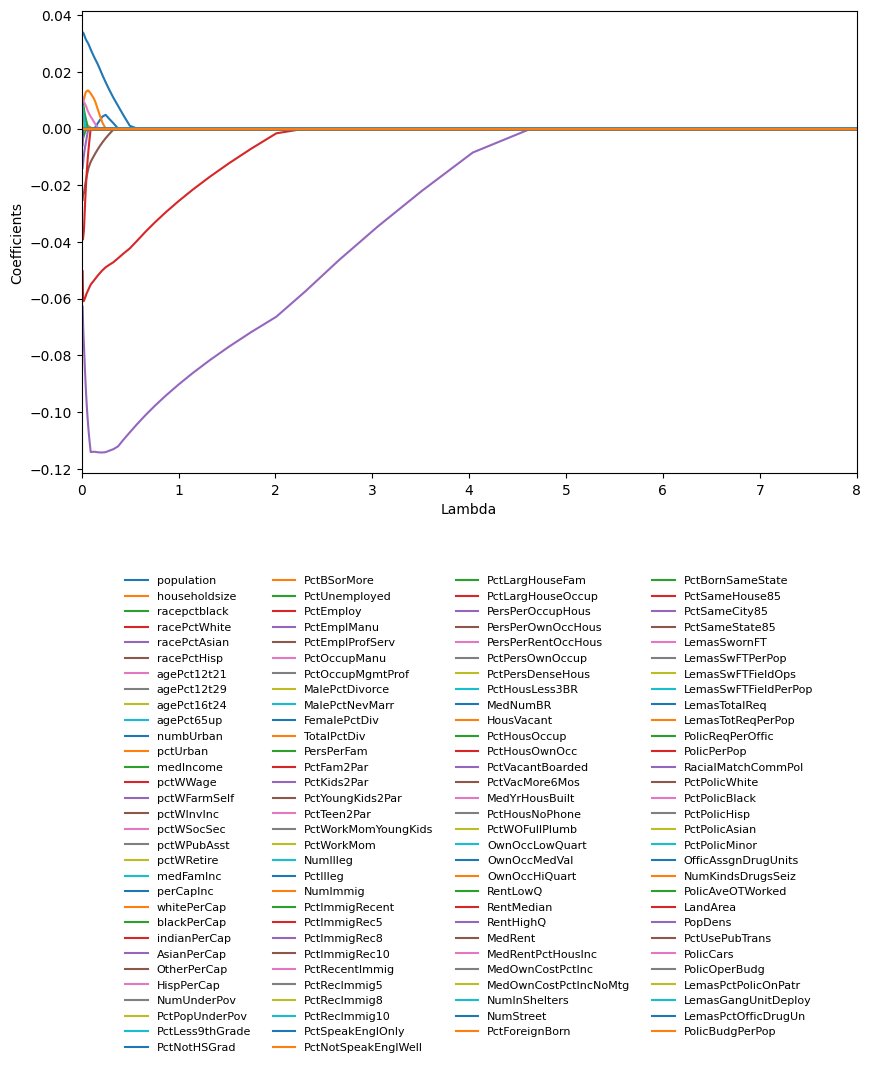

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Plot Lasso paths
plt.figure(figsize=(10, 6))
for j in range(X_standardized.shape[1]):  # For each variable
    plt.plot(lambdas, betasl[:, j], label=colnames[j])  # Use actual feature names


plt.xlim(0, 8)

plt.xlabel("Lambda")
plt.ylabel("Coefficients")

# Modify the legend: multiple columns, placed below the plot
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize=8, frameon=False)

plt.tight_layout()  # Adjust layout
plt.show()


In [ ]:
%%script false

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Plot Lasso paths
plt.figure(figsize=(10, 6))
for j in range(X_standardized.shape[1]):  # For each variable
    plt.plot(lambdas, betasl[:, j], label=f"Variable {j+1}")

plt.xlabel("Lambda")
plt.ylabel("Coefficients")
plt.title("Lasso Regression Coefficient Paths")

# Modify the legend: multiple columns, below the plot
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize=8, frameon=False)

plt.tight_layout()  # Adjust layout
plt.show()


CalledProcessError: Command 'b'\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.linear_model import Lasso\n\n# Plot Lasso paths\nplt.figure(figsize=(10, 6))\nfor j in range(X_standardized.shape[1]):  # For each variable\n    plt.plot(lambdas, betasl[:, j], label=f"Variable {j+1}")\n\nplt.xlabel("Lambda")\nplt.ylabel("Coefficients")\nplt.title("Lasso Regression Coefficient Paths")\n\n# Modify the legend: multiple columns, below the plot\nplt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize=8, frameon=False)\n\nplt.tight_layout()  # Adjust layout\nplt.show()\n'' returned non-zero exit status 1.

In [ ]:
%%script false

# Plot Lasso paths
plt.figure(figsize=(10, 6))
for j in range(X_standardized.shape[1]): #for each variable
    plt.plot(lambdas, betasl[:, j], label=f"Variable {j+1}")
plt.xlabel("Lambda")
plt.ylabel("Coefficients")
plt.title("Lasso Regression Coefficient Paths")
plt.legend(colnames)
plt.show()

CalledProcessError: Command 'b'\n# Plot Lasso paths\nplt.figure(figsize=(10, 6))\nfor j in range(X_standardized.shape[1]): #for each variable\n    plt.plot(lambdas, betasl[:, j], label=f"Variable {j+1}")\nplt.xlabel("Lambda")\nplt.ylabel("Coefficients")\nplt.title("Lasso Regression Coefficient Paths")\nplt.legend(colnames)\nplt.show()\n'' returned non-zero exit status 1.

## Elastic net

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from numpy.linalg import inv, eig
from sklearn.base import BaseEstimator
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
try:
    import statsmodels.api.add_constant
except ImportError:
    pass

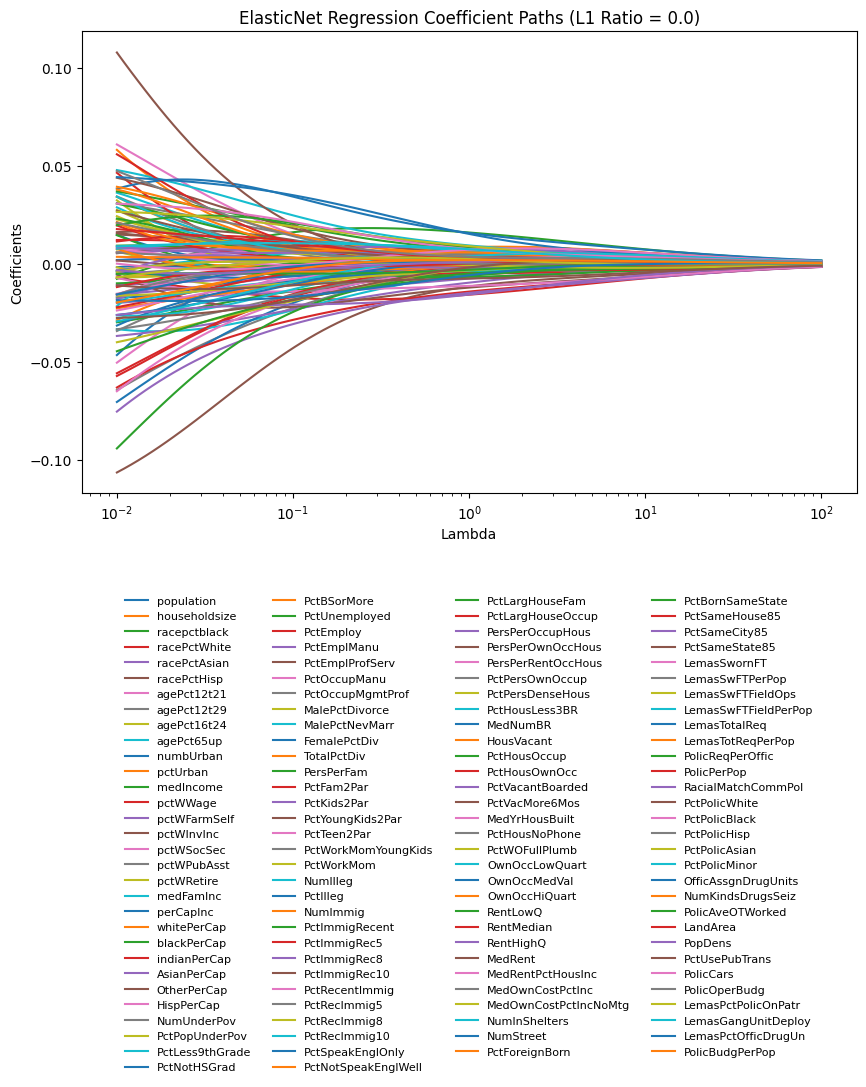

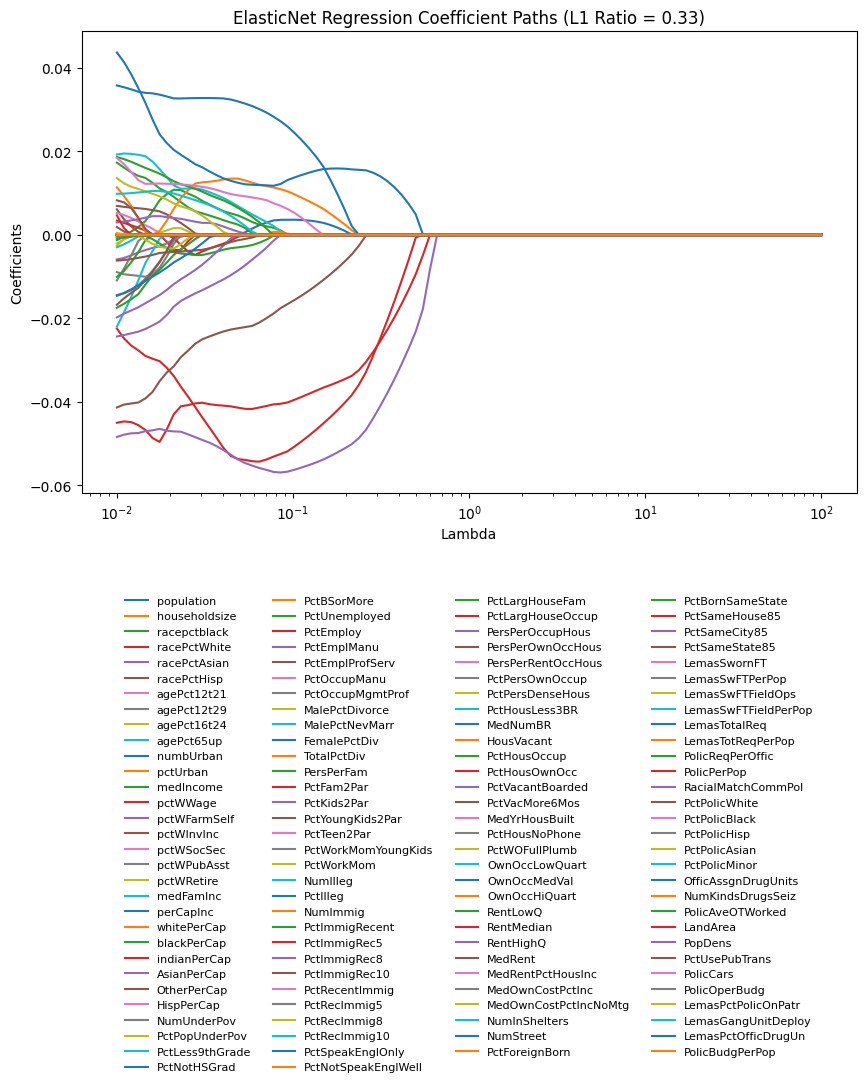

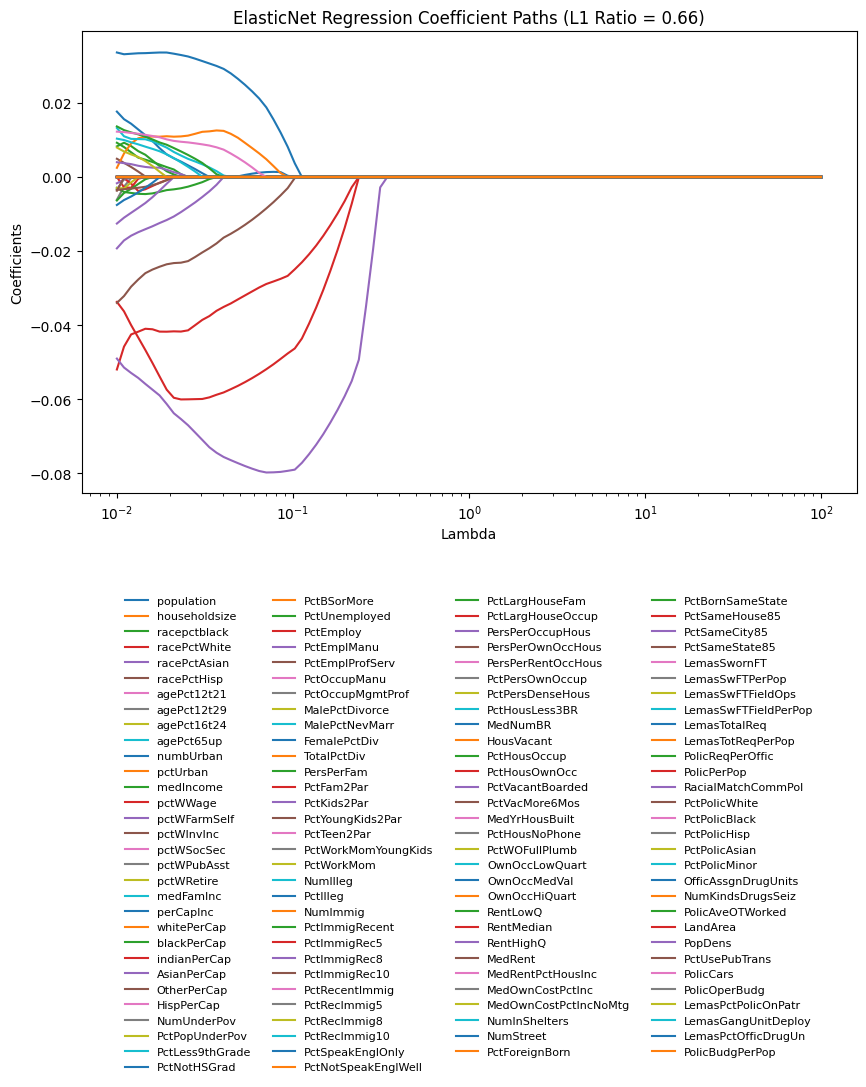

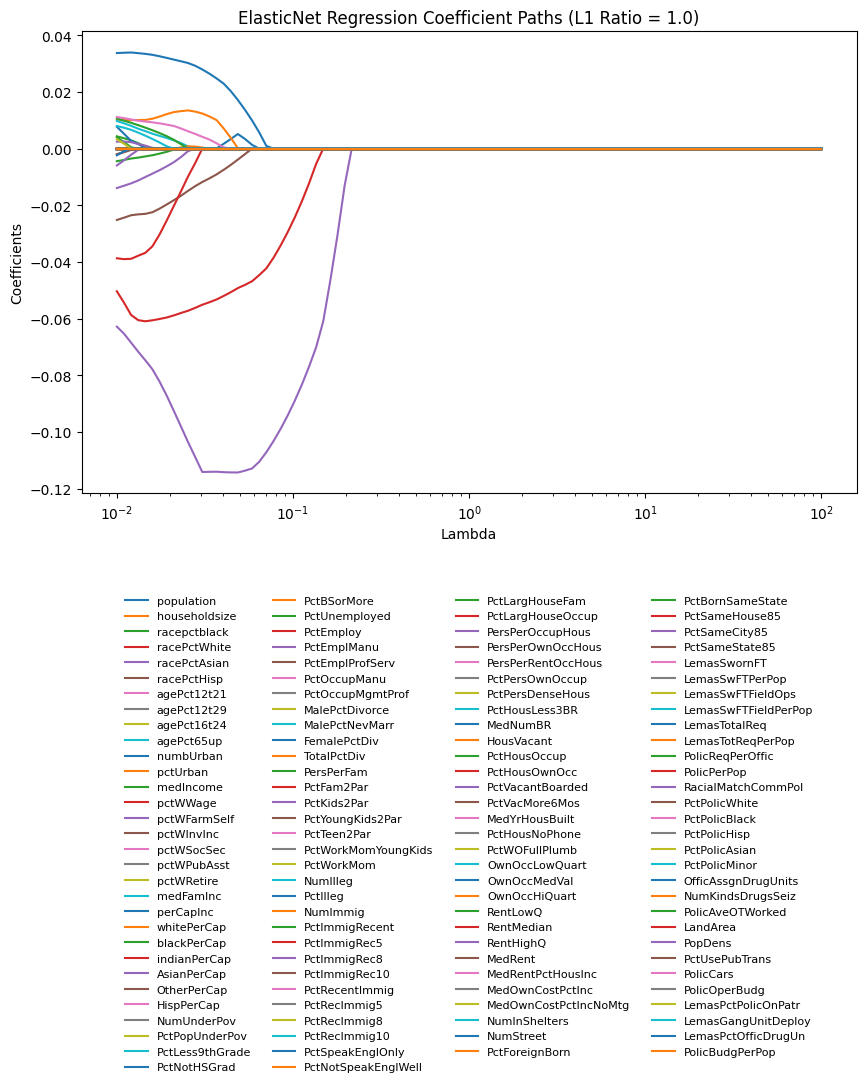

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet

warnings.filterwarnings("ignore")

lambdas = np.exp(np.linspace(np.log(0.01), np.log(100), 100))
l1ratios = np.array([0, 0.33, 0.66, 1])
coefs = pd.DataFrame()

for l1ratio in l1ratios:
    betase = np.zeros((len(lambdas), X.shape[1]))

    for i, lamb in enumerate(lambdas):
        elasticnet = ElasticNet(alpha=lamb, l1_ratio=l1ratio, fit_intercept=False)
        elasticnet.fit(X_standardized, y_centered)
        betase[i, :] = elasticnet.coef_

    # Plot ElasticNet paths (log-scale)
    plt.figure(figsize=(10, 6))
    for j in range(X_standardized.shape[1]):  # For each variable
        plt.plot(lambdas, betase[:, j], label=colnames[j])  # Use actual feature names

    plt.xscale("log")
    plt.xlabel("Lambda")
    plt.ylabel("Coefficients")
    # plt.title(f"ElasticNet Regression Coefficient Paths (L1 Ratio = {l1ratio})"), 0, 0.33, 0.66, 1

    # Modify the legend: multi-column, placed below the plot
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize=8, frameon=False)

    plt.tight_layout()  # Adjust layout
    plt.show()

    # Fit ElasticNet with alpha=1 for final coefficients storage
    elasticnet = ElasticNet(alpha=1, l1_ratio=l1ratio, fit_intercept=False)
    elasticnet.fit(X_standardized, y_centered)
    coefs[l1ratio] = elasticnet.coef_


In [ ]:
%%script false

import warnings
warnings.filterwarnings("ignore")

lambdas = np.exp(np.linspace(np.log(0.01), np.log(100), 100))
l1ratios = np.array([0, 0.33, 0.66, 1])
coefs = pd.DataFrame()
for l1ratio in l1ratios:
    betase = np.zeros((len(lambdas), X.shape[1]))
    for i, lamb in enumerate(lambdas):
        elasticnet = ElasticNet(alpha=lamb, l1_ratio = l1ratio, fit_intercept=False)
        elasticnet.fit(X_standardized, y_centered)
        betase[i, :] = elasticnet.coef_

    # Plot Lasso paths (log-scale)
    plt.figure(figsize=(10, 6))
    for j in range(X_standardized.shape[1]): #for each variable
        plt.plot(lambdas, betase[:, j], label=f"Variable {j+1}")
    plt.xscale("log")
    plt.xlabel("Lambda")
    plt.ylabel("Coefficients")
    plt.title("ElasticNet Regression Coefficient Paths with L1Ratio " + str(l1ratio))
    plt.legend(colnames)
    plt.show()
    elasticnet = ElasticNet(alpha=1, l1_ratio = l1ratio, fit_intercept=False)
    elasticnet.fit(X_standardized, y_centered)
    coefs[l1ratio] = elasticnet.coef_

CalledProcessError: Command 'b'\nimport warnings\nwarnings.filterwarnings("ignore")\n\nlambdas = np.exp(np.linspace(np.log(0.01), np.log(100), 100))\nl1ratios = np.array([0, 0.33, 0.66, 1])\ncoefs = pd.DataFrame()\nfor l1ratio in l1ratios:\n    betase = np.zeros((len(lambdas), X.shape[1]))\n    for i, lamb in enumerate(lambdas):\n        elasticnet = ElasticNet(alpha=lamb, l1_ratio = l1ratio, fit_intercept=False)\n        elasticnet.fit(X_standardized, y_centered)\n        betase[i, :] = elasticnet.coef_\n\n    # Plot Lasso paths (log-scale)\n    plt.figure(figsize=(10, 6))\n    for j in range(X_standardized.shape[1]): #for each variable\n        plt.plot(lambdas, betase[:, j], label=f"Variable {j+1}")\n    plt.xscale("log")\n    plt.xlabel("Lambda")\n    plt.ylabel("Coefficients")\n    plt.title("ElasticNet Regression Coefficient Paths with L1Ratio " + str(l1ratio))\n    plt.legend(colnames)\n    plt.show()\n    elasticnet = ElasticNet(alpha=1, l1_ratio = l1ratio, fit_intercept=False)\n    elasticnet.fit(X_standardized, y_centered)\n    coefs[l1ratio] = elasticnet.coef_\n'' returned non-zero exit status 1.

In [ ]:
coefs_df = pd.DataFrame(coefs)
coefs_df.insert(0, 'Variables', colnames)
print("The coefficients of each l1ratio at regularization parameter 1 are")
print(coefs_df.to_string(index=False))

The coefficients of each l1ratio at regularization parameter 1 are
            Variables       0.0  0.33  0.66  1.0
           population -0.000538   0.0   0.0  0.0
        householdsize  0.000921   0.0   0.0  0.0
         racepctblack  0.015858   0.0   0.0  0.0
         racePctWhite -0.015859  -0.0  -0.0 -0.0
         racePctAsian  0.000797  -0.0  -0.0 -0.0
          racePctHisp  0.001658   0.0   0.0  0.0
          agePct12t21  0.002735   0.0   0.0  0.0
          agePct12t29 -0.002153   0.0   0.0  0.0
          agePct16t24 -0.000319   0.0   0.0  0.0
           agePct65up  0.002687  -0.0  -0.0 -0.0
            numbUrban -0.000410   0.0   0.0  0.0
             pctUrban  0.001092   0.0   0.0  0.0
            medIncome -0.003019  -0.0  -0.0 -0.0
             pctWWage -0.005528  -0.0  -0.0 -0.0
         pctWFarmSelf -0.007648  -0.0  -0.0 -0.0
           pctWInvInc -0.011675  -0.0  -0.0 -0.0
           pctWSocSec  0.001058   0.0   0.0  0.0
          pctWPubAsst  0.006324   0.0   0.0  0.0
  

## best subset

In [135]:
# Define a linear regression model
linear_reg = LinearRegression()

#Obtain exhaustive mse values
efs = EFS(
    linear_reg,
    min_features=1, 
    max_features=8,
    scoring="neg_mean_squared_error", #we use negative mse since the sfs method maximizes the score 
    cv=0
)
efs.fit(X_new, y_new)

#Obtain a summary of the exhaustive results (all possible models)
efs_summary = pd.DataFrame.from_dict(efs.get_metric_dict()).T[["feature_idx", "avg_score"]]
efs_summary["feature_idx"]
efs_size = np.zeros(len(efs_summary))
for i in range(len(efs_summary)):
    efs_size[i] = len(efs_summary["feature_idx"][i])
efs_summary['model size'] = efs_size
efs_summary.rename(columns={'avg_score': 'neg_mse'}, inplace=True)
print("The first few results for exhaustive feature selection (all possible models) look like:")
print(efs_summary.iloc[range(15)].to_string(index=False))

KeyboardInterrupt: 

In [ ]:
#code to calculate sigma hat squared for Mallows Cp calculation
X_with_const = sm.tools.tools.add_constant(X)
model = sm.regression.linear_model.OLS(Y, X_with_const).fit()
sigma_hat_squared = np.sum(model.resid ** 2) / (len(Y) - len(X[0])) #intercept not counted as predictor
#code to calculate total sum of squares, used for r2 calculation:
Y_mean = np.mean(Y)
tss = sum((Y - np.full(len(Y), Y_mean))**2)

prederror = np.zeros((len(efs_summary),4))
for i in range(len(efs_summary)):
    rss = -efs_summary.iloc[i,1]*len(X)
    p = efs_summary.iloc[i,2]
    n = len(X)
    aic = 2*p + n * np.log(rss/n)
    bic = p * np.log(n) + n * np.log(rss/n)
    mallows_cp = (rss / sigma_hat_squared) - n + 2 * p
    r2 = 1 - rss/tss
    adjr2 = 1 - (1 - r2)*(n-1)/(n-p-1)
    prederror[i,0] = bic
    prederror[i,1] = adjr2
    prederror[i,2] = mallows_cp
    prederror[i,3] = aic

efs_summary['bic'] = prederror[:,0]
efs_summary['adjr2'] = prederror[:,1]
efs_summary['cp'] = prederror[:,2]
efs_summary['aic'] = prederror[:,3]
print(efs_summary.iloc[0:15,:].to_string(index=False))

## Part B

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy.random import default_rng
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
import statsmodels.api as sm
from statsmodels.api import OLS

In [ ]:
y_centered

0      -0.241191
16      0.048809
20     -0.101191
21      0.248809
23      0.188809
          ...   
1969    0.308809
1981   -0.371191
1991   -0.211191
1992   -0.251191
1993    0.038809
Name: y, Length: 319, dtype: float64

In [ ]:
# Set a random seed for reproducibility
rng = default_rng(1)

# Define the proportions for the split
train_prop = 0.6
validation_prop = 0.2
test_prop = 0.2

# Calculate the number of observations for each split
total_samples = X_with_y_cleaned.shape[0]

train_size = int(train_prop * total_samples)
validation_size = int(validation_prop * total_samples)
test_size = total_samples - train_size - validation_size

# Create a random permutation of row indices
indices = rng.choice(np.arange(total_samples), size=(total_samples), replace=False)

# Split the dataset into train, validation, and test sets
y_train = y_new[indices[:train_size]]
y_val = y_new[indices[(train_size + 1):(train_size + validation_size)]]
y_test = y_new[indices[(train_size + validation_size + 1):]]

X_train = X_standardized[indices[:train_size]]
X_val = X_standardized[indices[(train_size + 1):(train_size + validation_size)]]
X_test = X_standardized[indices[(train_size + validation_size + 1):]]

KeyError: '[47, 66, 261, 34, 249, 87, 39, 280, 221, 141, 85, 259, 201, 140, 65, 26, 32, 127, 10, 303, 202, 108, 252, 169, 237, 218, 309, 86, 73, 256, 270, 198, 278, 308, 69, 122, 64, 19, 117, 225, 181, 135, 276, 49, 59, 242, 40, 228, 176, 214, 285, 241, 88, 213, 83, 304, 118, 231, 71, 111, 200, 161, 11, 268, 1, 171, 288, 7, 153, 173, 143, 182, 92, 126, 42, 166, 12, 130, 232, 75, 178, 98, 273, 28, 84, 230, 62, 72, 192, 154, 104, 53, 203, 45, 25, 152, 9, 44, 180, 17, 48, 295, 22, 137, 164, 157, 317, 167, 82, 179, 149, 286, 13, 226, 147, 189, 38, 301, 138, 208, 258, 18, 15, 188, 61, 136, 106, 207, 235, 36, 292, 46, 209, 212, 57, 93, 245, 234, 279, 265, 298, 194, 24, 193, 133, 131, 27, 96, 128] not in index'